# Analysis of the collected data

The data was collected from the BoardGameGeek API ("https://boardgamegeek.com/xmlapi2/thing
"). It contains a comprehensive collection of board games, with a wide range of information including game names, rankings, ratings, descriptions, and various other details.

Firstly, we will load the data and analyze each column to retrieve only relevant information.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")
df2 = pd.read_csv("bgg_boardgames_full_sorted_part02.csv")
df3 = pd.read_csv("bgg_boardgames_full_sorted_part03.csv")

# Concatenate the dataframes while maintaining their order
df = pd.concat([df1, df2, df3], ignore_index=True)

print(df.head(1))

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_14692\638423124.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")


       id       type               name  \
0  224517  boardgame  Brass: Birmingham   

                                           alt_names  yearpublished  \
0  Brass. Бирмингем, Brass. Бірмінгем, ブラス：バーミンガム...           2018   

                                         description  \
0  Brass: Birmingham is an economic strategy game...   

                                               image  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...   

                                           thumbnail  minplayers  maxplayers  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...           2           4   

   ...   stddev  median  owned  trading wanting wishing numweights  \
0  ...  1.42058       0  77098      288    1749   20493       2638   

  averageweight rank_boardgame           ranks_other  
0        3.8685              1  Strategy Game Rank:1  

[1 rows x 37 columns]


We will start our investigation on the first and the second column analyzing if there are repeated or null id's and if in the second column there is only one type of game or null value (boardgame)

There are 0 duplicated rows
There are 0 duplicated IDs
There are 0 null IDs
There are 0 null types


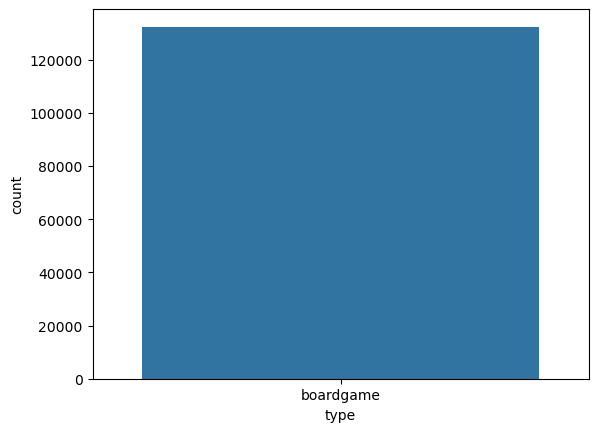

In [14]:
duplicateds = df[df.duplicated()]

print(f'There are {duplicateds.shape[0]} duplicated rows') # duplicated rows

duplicatedsId = df[df.duplicated(subset=["id"])]

print(f'There are {duplicatedsId.shape[0]} duplicated IDs')  # duplicated ids

null_ids = df[df["id"].isna()].shape[0]
null_type = df[df["type"].isna()].shape[0]

print(f'There are {null_ids} null IDs')
print(f'There are {null_type} null types')

sb.countplot(df, x = "type")
plt.show()

As we observe, all entries in the "type" column are labeled as "boardgame," which is expected. Therefore, we can safely remove this column, as it does not contribute meaningfully to our analysis.

We will now validate key parameters, starting with the number of players and the name field, to identify any irregular or unexpected values.

In [15]:
# Check for validity in key columns
invalid_players = df[(df['minplayers'].isnull()) | (df['maxplayers'].isnull()) | (df['minplayers'] == 0) | (df['maxplayers'] == 0)]
invalid_names = df[df['name'].isnull()]
print(f"Rows with invalid player numbers: {invalid_players.shape[0]}")
print(f"Rows with missing names: {invalid_names.shape[0]}")
if not invalid_players.empty:
    print("Sample invalid player rows:")
    print(invalid_players.head())
if not invalid_names.empty:
    print("Sample rows with missing names:")
    print(invalid_names.head())

Rows with invalid player numbers: 5811
Rows with missing names: 0
Sample invalid player rows:
          id       type                                               name  \
3325   21804  boardgame                             Traditional Card Games   
3893   18291  boardgame                              Unpublished Prototype   
4006   37301  boardgame                                            Decktet   
5137   23953  boardgame                           Outside the Scope of BGG   
5837  170669  boardgame  Old School Tactical: Volume 1 – Fighting on th...   

                                 alt_names  yearpublished  \
3325   Kaarten, Kaartspelen, Playing Cards              0   
3893                                   NaN              0   
4006  Deco Decktet, Double Decktet, Дектет           2008   
5137                                   NaN              0   
5837                                   NaN           2016   

                                            description  \
3325  Tradi

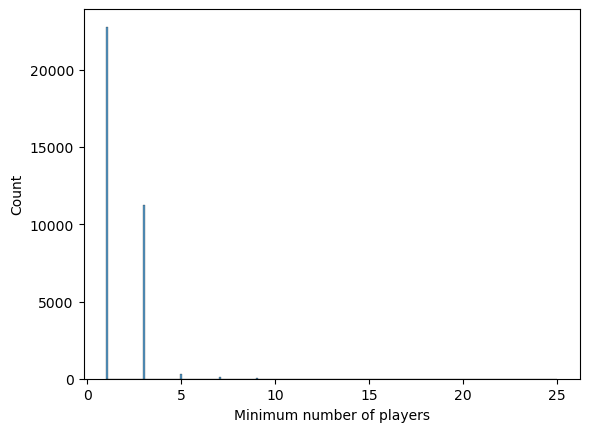

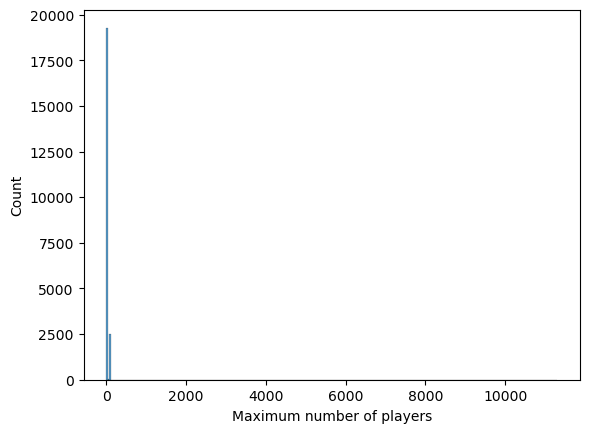

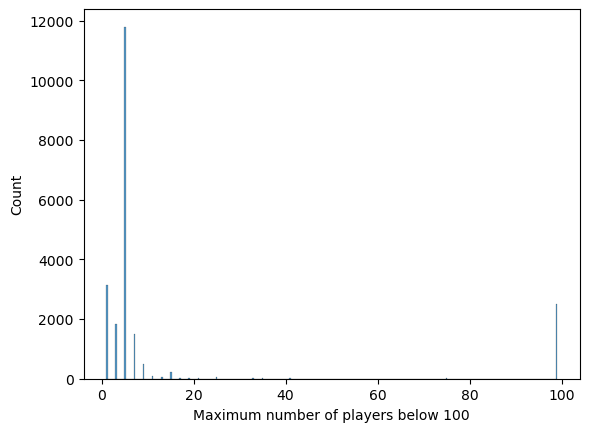

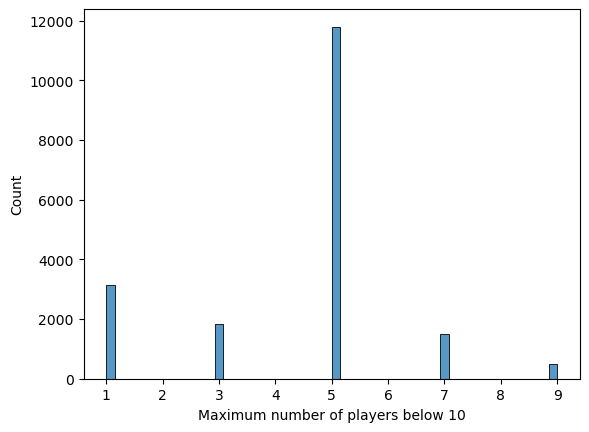

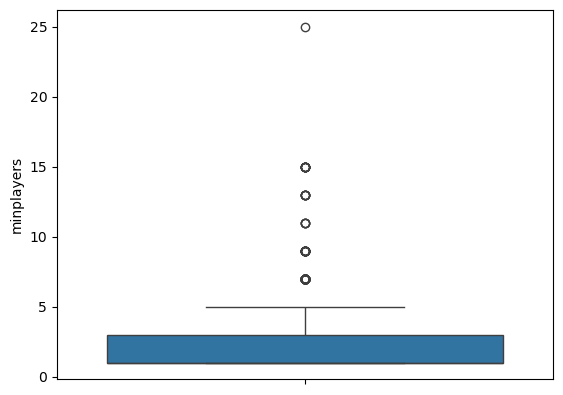

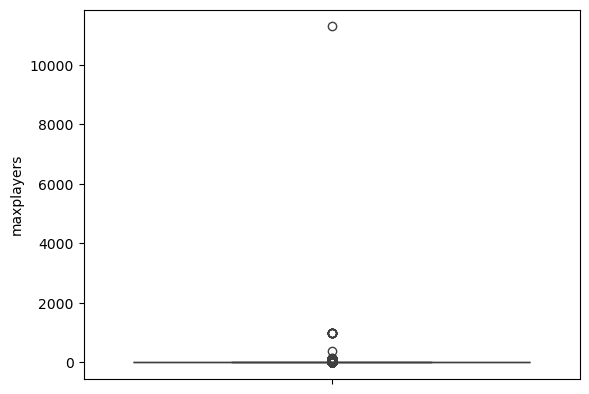

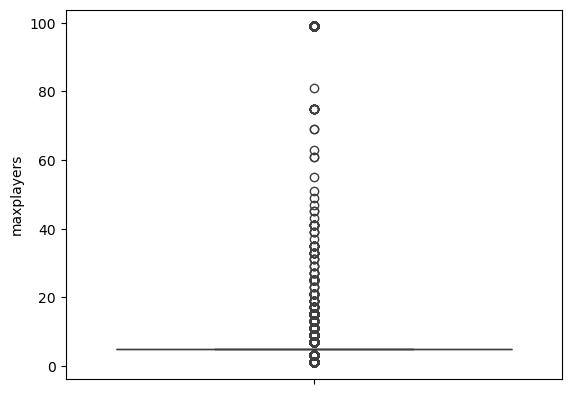

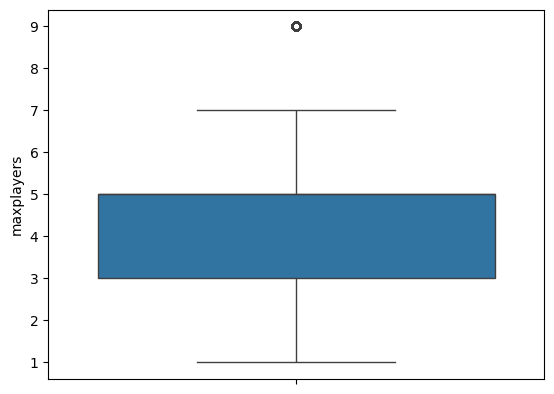

The game with the biggest minimum amount of players has 25 players
The game with the biggest maximum amount of players has 11299 players
The game with the biggest maximum amount of players is 31932    TOM: The Origins Metagame
Name: name, dtype: object


In [16]:
min_players_non_null = df.loc[df["minplayers"].notna() & df["minplayers"] != 0]
max_players_non_null = df.loc[df["maxplayers"].notna() & df["maxplayers"] != 0]
max_players_below_100 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 100]
max_players_below_10 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 10]

sb.histplot(min_players_non_null, x = "minplayers")
plt.xlabel("Minimum number of players")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_non_null, x = "maxplayers")
plt.xlabel("Maximum number of players")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_below_100, x = "maxplayers")
plt.xlabel("Maximum number of players below 100")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_below_10, x = "maxplayers")
plt.xlabel("Maximum number of players below 10")
plt.ylabel("Count")
plt.show()

sb.boxplot(min_players_non_null, y = "minplayers")
plt.show()

sb.boxplot(max_players_non_null, y = "maxplayers")
plt.show()

sb.boxplot(max_players_below_100, y = "maxplayers")
plt.show()

sb.boxplot(max_players_below_10, y = "maxplayers")
plt.show()

print(f'The game with the biggest minimum amount of players has {max(min_players_non_null["minplayers"])} players')
print(f'The game with the biggest maximum amount of players has {max(max_players_non_null["maxplayers"])} players')
print(f'The game with the biggest maximum amount of players is {max_players_non_null.loc[df["maxplayers"] == max(max_players_non_null["maxplayers"]), "name"]}')

Although all games have valid names, 5,811 entries lack meaningful player count data—either null or zero values for minimum or maximum players. This suggests missing metadata, which may require external validation. Given the dataset’s size, we can afford to discard these entries to maintain analytical consistency.
We observe that the minimum number of players required can vary significantly, with some games allowing up to 25 players. However, the vast majority of games have a minimum player count below 5. On the other hand, the maximum number of players shows even greater variability, reaching an extreme of 11,299 players in one case. Despite this outlier, most games support a maximum of fewer than 10 players. Although rare, board games with unusually high player counts do exist, so these outliers are valid and should be retained. These bigger results come from modular games that con be scaled. The maximum amount can be just a symbolic value.

Next, we turn to the 'alt names' column, which records alternative titles for each game. We'll assess this field for missing values, keeping in mind that not all games are expected to have alternate names. 

In [17]:
print(f'The column \'alt_names\' has {df[df["alt_names"].isna()].shape[0]} missing values.')

The column 'alt_names' has 108918 missing values.


While the column shows a high number of missing values, this is not concerning—alternative names are optional, and their absence does not compromise the dataset’s integrity.

Next, we are going to analize the 'yearpublished' column that lists the year of publishment of each game.

The column 'yearpublished' has 10618 missing values.
The column 'yearpublished' has 852 values after 2025. This means these games were not released for now.


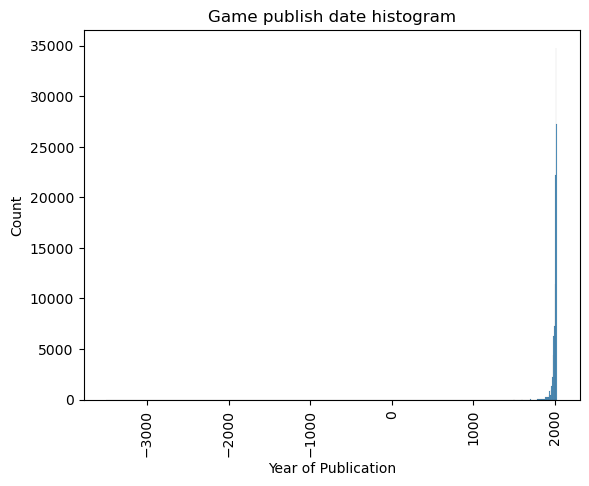

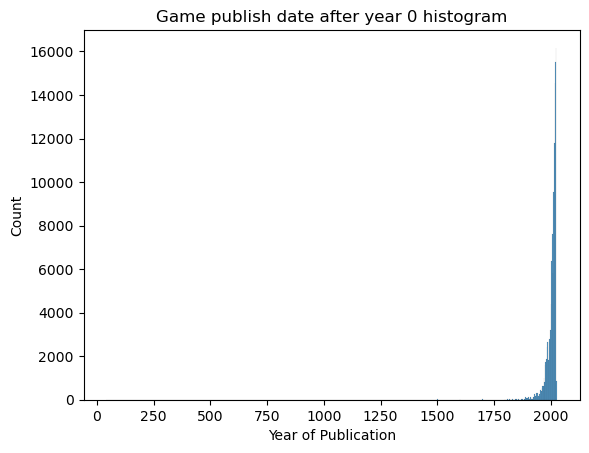

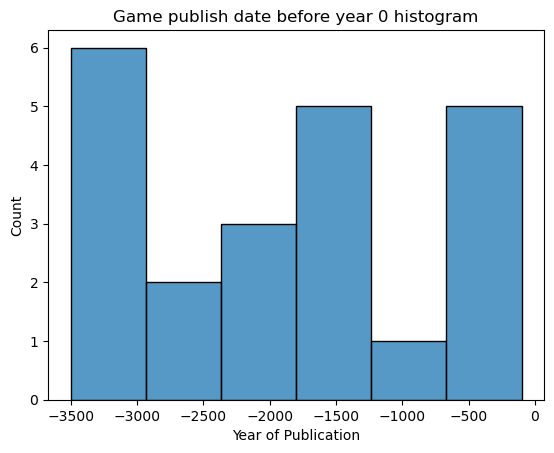

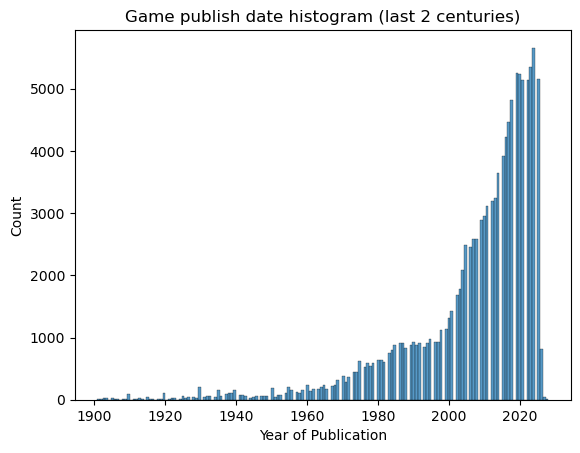

In [18]:
print(f'The column \'yearpublished\' has {df[df["yearpublished"].isna()].shape[0] + df[df["yearpublished"] == 0].shape[0]} missing values.')
print(f'The column \'yearpublished\' has {df[df["yearpublished"] > 2025].shape[0]} values after 2025. This means these games were not released for now.')
non_null_years_pub = df.loc[(df["yearpublished"].notna()) & (df["yearpublished"] != 0)]
sb.histplot(non_null_years_pub, x = "yearpublished")

plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram")
plt.xticks(rotation = 90)
plt.show()

positive_years_pub = non_null_years_pub.loc[df["yearpublished"] > 0]
negative_years_pub = non_null_years_pub.loc[df["yearpublished"] < 0]
recent_releases = non_null_years_pub.loc[df["yearpublished"] > 1900]
sb.histplot(positive_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date after year 0 histogram")
plt.show()
sb.histplot(negative_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date before year 0 histogram")
plt.show()
sb.histplot(recent_releases, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram (last 2 centuries)")
plt.show()



"The dataset includes games spanning a wide range of publication dates, with some entries even predating the Common Era. However, the majority were released within the last two centuries, with a strong concentration in the 21st century—particularly over the past decade. Notably, there are entries with missing publication dates, as well as others with future dates beyond the current year (2025), indicating that these games have not yet been released. To ensure temporal consistency and analytical reliability, these records should be excluded from further analysis. 

Now we will check if there are null or empty descriptions.

In [19]:
invalid_description = df.loc[df["description"].isna() | (df["description"].str.strip() == "")]
print(f'There are {invalid_description.shape[0]} null descriptions')

There are 37 null descriptions


The number of entries with null or empty descriptions is minimal, making it reasonable to discard them without impacting the number os entries in the final dataset.

Next, we examine the **'image' and 'thumbnail'** columns, which contain links to visual assets associated with each game. Since the search system is primarily text-based, these visual references offer limited utility for our analysis. Therefore, it is reasonable to exclude both columns from the dataset.

Now we will analyze the columns related to the playing time.

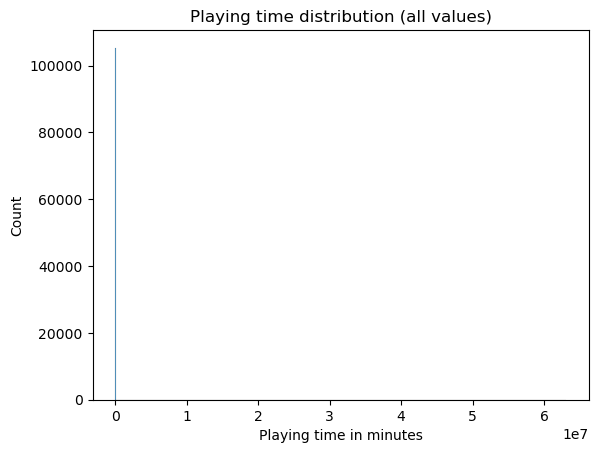

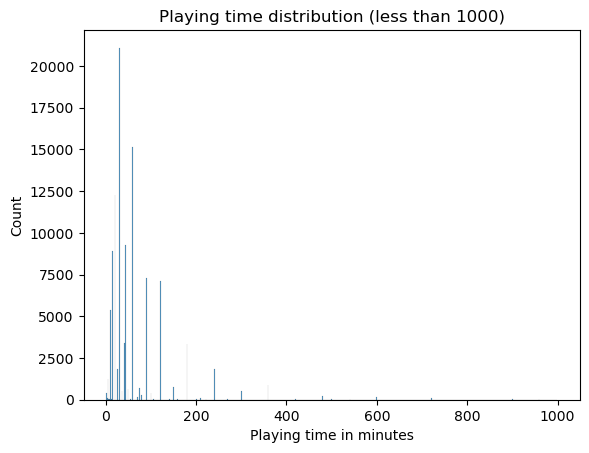

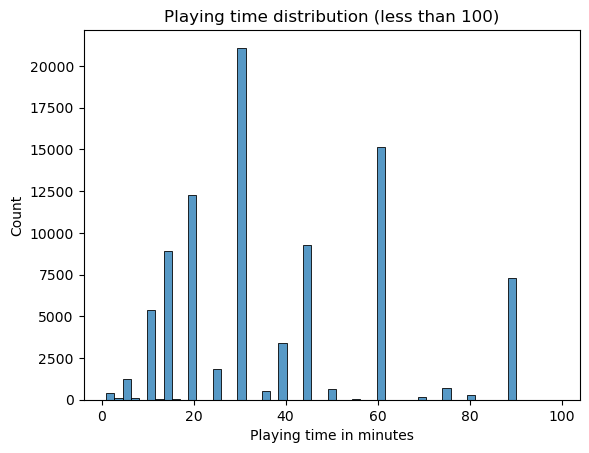

Maximum playing time is 63072000
There are 27020 null playing times
There are 288 extreme playing times (more than 1000 minutes)


In [20]:
null_playingtime = df[(df["playingtime"] == 0) | (df["playingtime"].isna())]
non_null_playingtime = df.loc[(df["playingtime"] != 0) & df["playingtime"].notna()]
less_than_1000_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 1000]
less_than_100_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 100]

sb.histplot(non_null_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Maximum playing time is {max(df["playingtime"])}')
print(f'There are {null_playingtime.shape[0]} null playing times')
print(f'There are {non_null_playingtime.loc[non_null_playingtime["playingtime"] > 1000].shape[0]} extreme playing times (more than 1000 minutes)')

It is evident that some games exhibit extremely high average playing times, with several exceeding 1000 minutes (over 16 hours). While such durations are rare, they may be valid for highly complex or marathon-style games. However, the most extreme values appear unrealistic. For instance, one entry lists an average playing time of 63,072,000 minutes—equivalent to 1,051,200 hours, or more than a century. This likely reflects either a data entry error or a game with no defined endpoint. Such outliers should be removed from the dataset or search in another source to improve the information, as they distort the overall analysis and search results.

On the other hand, most games tend to have a duration of 60 minutes or less, although a notable portion extends beyond 100 minutes, indicating a diverse range of gameplay experiences.

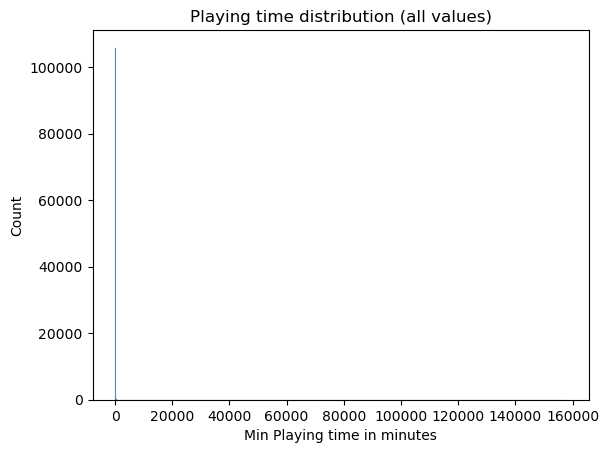

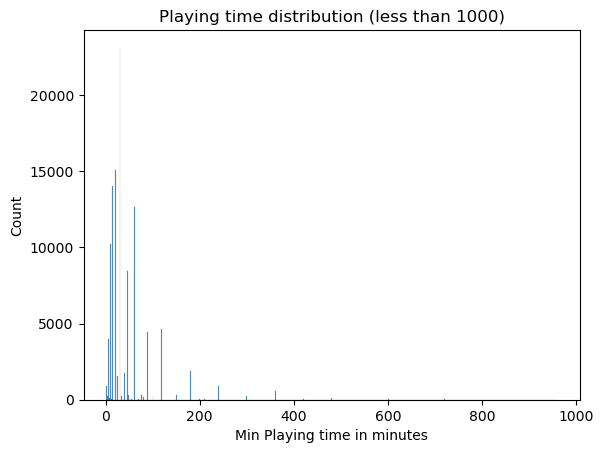

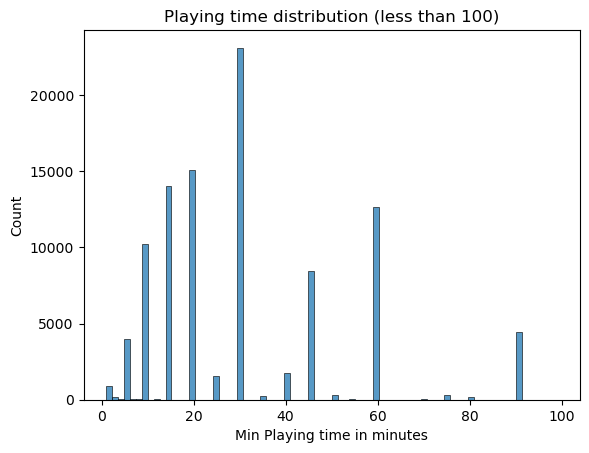

Maximum min playing time is 157680
There are 25374 null min playing times
There are 64 extreme min playing times (more than 1000 minutes)


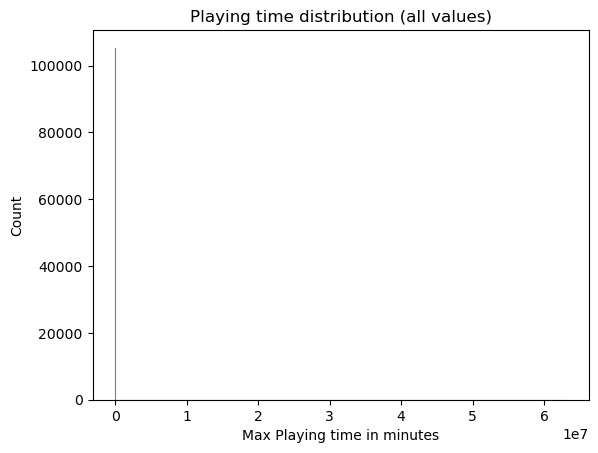

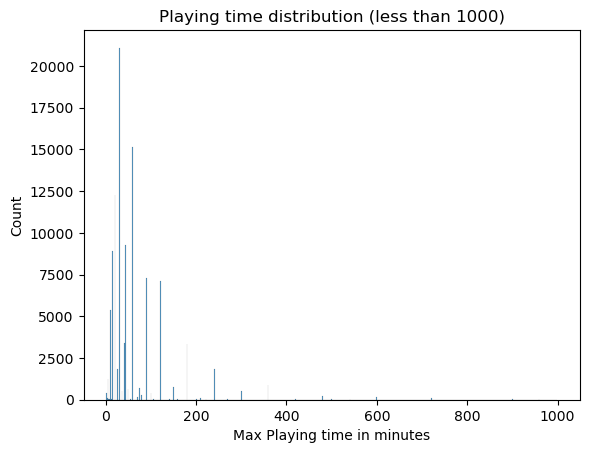

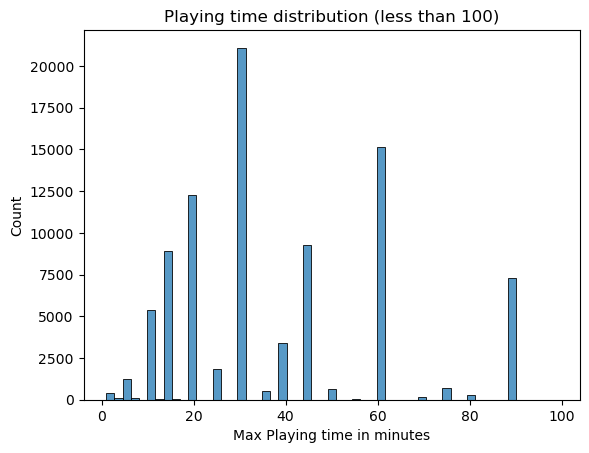

Minimum max playing time is 0
There are 27020 null max playing times
There are 288 extreme max playing times (more than 1000 minutes)
There are 74 entries with maxplaytime < minplaytime


In [24]:
null_minplayingtime = df[(df["minplaytime"] == 0) | (df["minplaytime"].isna())]
non_null_minplayingtime = df.loc[(df["minplaytime"] != 0) & df["minplaytime"].notna()]
less_than_1000_minplayingtime = non_null_minplayingtime.loc[non_null_minplayingtime["minplaytime"] < 1000]
less_than_100_minplayingtime = non_null_minplayingtime.loc[non_null_minplayingtime["minplaytime"] < 100]

null_maxplayingtime = df[(df["maxplaytime"] == 0) | (df["maxplaytime"].isna())]
non_null_maxplayingtime = df.loc[(df["maxplaytime"] != 0) & df["maxplaytime"].notna()]
less_than_1000_maxplayingtime = non_null_maxplayingtime.loc[non_null_maxplayingtime["maxplaytime"] < 1000]
less_than_100_maxplayingtime = non_null_maxplayingtime.loc[non_null_maxplayingtime["maxplaytime"] < 100]

sb.histplot(non_null_minplayingtime, x = "minplaytime")
plt.xlabel("Min Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_minplayingtime, x = "minplaytime")
plt.xlabel("Min Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_minplayingtime, x = "minplaytime")
plt.xlabel("Min Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Maximum min playing time is {max(df["minplaytime"])}')
print(f'There are {null_minplayingtime.shape[0]} null min playing times')
print(f'There are {non_null_minplayingtime.loc[non_null_minplayingtime["minplaytime"] > 1000].shape[0]} extreme min playing times (more than 1000 minutes)')


sb.histplot(non_null_maxplayingtime, x = "maxplaytime")
plt.xlabel("Max Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_maxplayingtime, x = "maxplaytime")
plt.xlabel("Max Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_maxplayingtime, x = "maxplaytime")
plt.xlabel("Max Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Minimum max playing time is {min(df["maxplaytime"])}')
print(f'There are {null_maxplayingtime.shape[0]} null max playing times')
print(f'There are {non_null_maxplayingtime.loc[non_null_maxplayingtime["maxplaytime"] > 1000].shape[0]} extreme max playing times (more than 1000 minutes)')


# Next, we will analyze if there are any entries with maxplaytime < minplaytime

invalid_playingtimes = df.loc[(df["minplaytime"].notna()) & (df["maxplaytime"].notna()) & (df["minplaytime"] != 0) & (df["maxplaytime"] != 0) & (df["maxplaytime"] < df["minplaytime"])]
print(f'There are {invalid_playingtimes.shape[0]} entries with maxplaytime < minplaytime')




The analysis of minimum and maximum playtimes shows that while most games report reasonable durations, there are expected outliers, consistent with the previous playing time analysis. The majority of titles have modest minimum and maximum playtimes, which should be preserved. However, there are 74 records where minplaytime is greater than maxplaytime, which is not logically possible. These entries represent data inconsistencies and should be treated as errors—either removed from the dataset or corrected using alternative sources of information.

Next we will analyze the minage column.

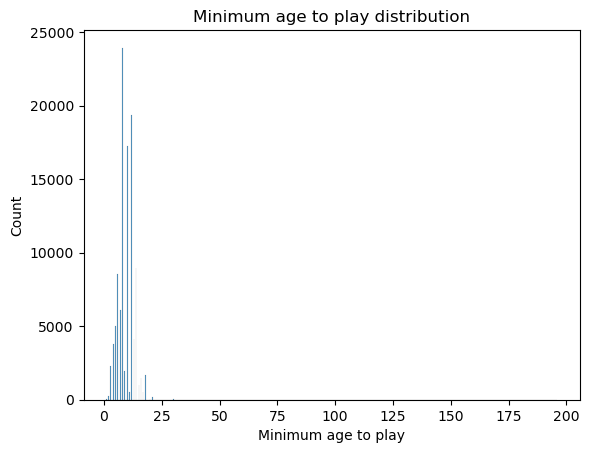

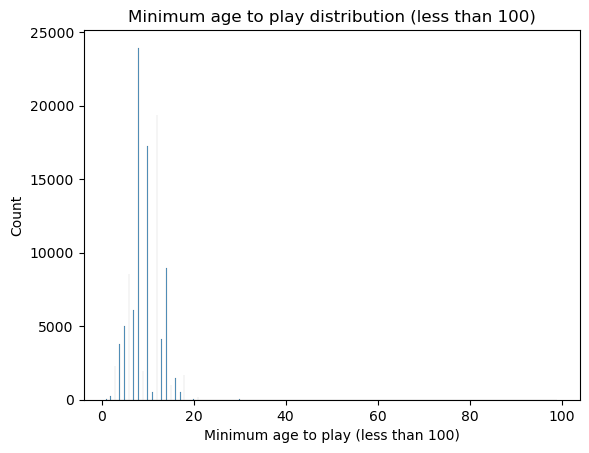

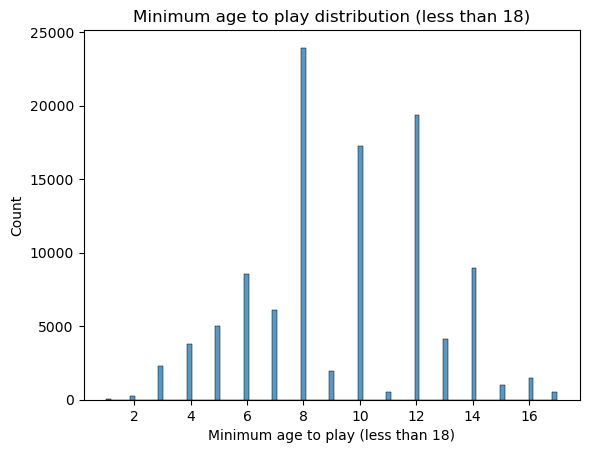

Maximum minimum age to play is 196
There are 25203 null minimum ages to play
There are 4 extreme minimum ages to play (more than 100 years old)


In [26]:
# Next we will analyze the minage column refering to the lowest age allowed for someone to play that boardgame.

null_minage = df[(df["minage"] == 0) | (df["minage"].isna())]
non_null_minage = df.loc[(df["minage"] != 0) & df["minage"].notna()]
less_than_100_minage = non_null_minage.loc[non_null_minage["minage"] < 100]
less_than_18_minage = non_null_minage.loc[non_null_minage["minage"] < 18]
sb.histplot(non_null_minage, x = "minage")
plt.xlabel("Minimum age to play")
plt.ylabel("Count")
plt.title("Minimum age to play distribution")
plt.show()

sb.histplot(less_than_100_minage, x = "minage")
plt.xlabel("Minimum age to play (less than 100)")
plt.ylabel("Count")
plt.title("Minimum age to play distribution (less than 100)")
plt.show()

sb.histplot(less_than_18_minage, x = "minage")
plt.xlabel("Minimum age to play (less than 18)")
plt.ylabel("Count")
plt.title("Minimum age to play distribution (less than 18)")
plt.show()

print(f'Maximum minimum age to play is {max(df["minage"])}')
print(f'There are {null_minage.shape[0]} null minimum ages to play')
print(f'There are {non_null_minage.loc[non_null_minage["minage"] > 100].shape[0]} extreme minimum ages to play (more than 100 years old)')


Since this column is optional, there is no need to remove entries with null or zero values. The most noticeable issue in the results is that four games have a minimum age greater than 100 years, which is clearly a data inconsistency. These entries should be removed from the dataset.

Next we will see the publishers, designers and artists columns.

In [29]:
null_publishers = df[df["publishers"].isna() | (df["publishers"].str.strip() == "")]
print(f'There are {null_publishers.shape[0]} null publishers')
print(f'There are {df["publishers"].nunique()} unique publishers')
print(f'The publisher with the most games is {df["publishers"].value_counts().idxmax()} with {df["publishers"].value_counts().max()} games')

null_designers = df[df["designers"].isna() | (df["designers"].str.strip() == "")]
print(f'There are {null_designers.shape[0]} null designers')
print(f'There are {df["designers"].nunique()} unique designers')
print(f'The designer with the most games is {df["designers"].value_counts().idxmax()} with {df["designers"].value_counts().max()} games')

null_artists = df[df["artists"].isna() | (df["artists"].str.strip() == "")]
print(f'There are {null_artists.shape[0]} null artists')
print(f'There are {df["artists"].nunique()} unique artists')
print(f'The artist with the most games is {df["artists"].value_counts().idxmax()} with {df["artists"].value_counts().max()} games')

print(df["publishers"].head(10))


There are 4 null publishers
There are 42008 unique publishers
The publisher with the most games is (Self-Published) with 8633 games
There are 23803 null designers
There are 37056 unique designers
The designer with the most games is (Uncredited) with 18800 games
There are 75678 null artists
There are 26449 unique artists
The artist with the most games is (Uncredited) with 4117 games
0    Roxley, Arclight Games, Board Game Rookie, Boa...
1    Z-Man Games, Asterion Press, Devir, Filosofia ...
2    Feuerland Spiele, Capstone Games, CMON Global ...
3    Cephalofair Games, Albi, Albi Polska, Arclight...
4    Dire Wolf, Arclight Games, Broadway Toys LTD, ...
5    Fantasy Flight Games, ADC Blackfire Entertainm...
6    FryxGames, Arclight Games, Brädspel.se, Fantas...
7    Ares Games, Angry Lion Games, Devir, GaGa Game...
8    Fantasy Flight Games, ADC Blackfire Entertainm...
9    Dire Wolf, Arclight Games, Galápagos Jogos, Ge...
Name: publishers, dtype: object


For these columns, there is little to analyze beyond the null values for publishers, designers, and artists. These missing values can either be treated as Uncredited or Self-Published, or the corresponding rows can be removed from the database. Since there are many entries with null designers and artists, it is preferable to assume these are entry errors and fill them with default values.

We will now analyze the categories column.